<a href="https://colab.research.google.com/github/zaidmukaddam/tindog/blob/main/DFT_covid_perdiocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Members**



*   **K025 - Samyak Jain**
*   **K039 - Zaid Mukaddam**
*   **K049 - Prabhjot Singh Saini**



# AIM: 
Covid Periodicity Analysis Using Discret Fourier Transform

## Introduction:
The Fourier Transform is a magical mathematical tool. The Fourier Transform decomposes any function into a sum of sinusoidal basis functions. Each of these basis functions is a complex exponential of a different frequency. The Fourier Transform therefore gives us a unique way of viewing any function - as the sum of simple sinusoids.


## Implementaion

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from scipy.fft import fft, fftfreq
import seaborn as sns

sns.set_theme("notebook")
sns.set_style("whitegrid")
params = {'legend.fontsize': 'small','figure.figsize': (10, 5),'axes.labelsize': 'small','xtick.labelsize':'small','ytick.labelsize':'small'}
plt.rcParams.update(params)

In [ ]:
 !curl https://covid.ourworldindata.org/data/owid-covid-data.csv -o ./owid-covid-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46.5M    0 46.5M    0     0  57.2M      0 --:--:-- --:--:-- --:--:-- 57.1M


In [ ]:
nations = sorted([
    "Argentina",
    "Australia",
    "Brazil",
    "Canada",
    "France",
    "Germany",
    "Japan",
    "India",
    "Indonesia",
    "Italy",
    "Mexico",
    "Russia",
    "South Africa",
    "Saudi Arabia",
    "South Korea",
    "Turkey",
    "United Kingdom",
    "United States",
    "Spain",
    "Sweden",
    "Croatia",
    "Hungary",
    "Belgium",
    "Portugal",
    "Norway",
    "Colombia",
    "Chile",
    "Denmark",
    "Austria",
    "Morocco"
])

data = pd.read_csv("./owid-covid-data.csv")
data['new_cases'] = data['new_cases'].fillna(0)
data['new_deaths'] = data['new_deaths'].fillna(0)
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.0,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171112,ZWE,Africa,Zimbabwe,2022-03-21,244685.0,233.0,253.714,5429.0,3.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
171113,ZWE,Africa,Zimbabwe,2022-03-22,244685.0,0.0,253.714,5429.0,0.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
171114,ZWE,Africa,Zimbabwe,2022-03-23,244958.0,273.0,186.857,5432.0,3.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
171115,ZWE,Africa,Zimbabwe,2022-03-24,245194.0,236.0,220.571,5432.0,0.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


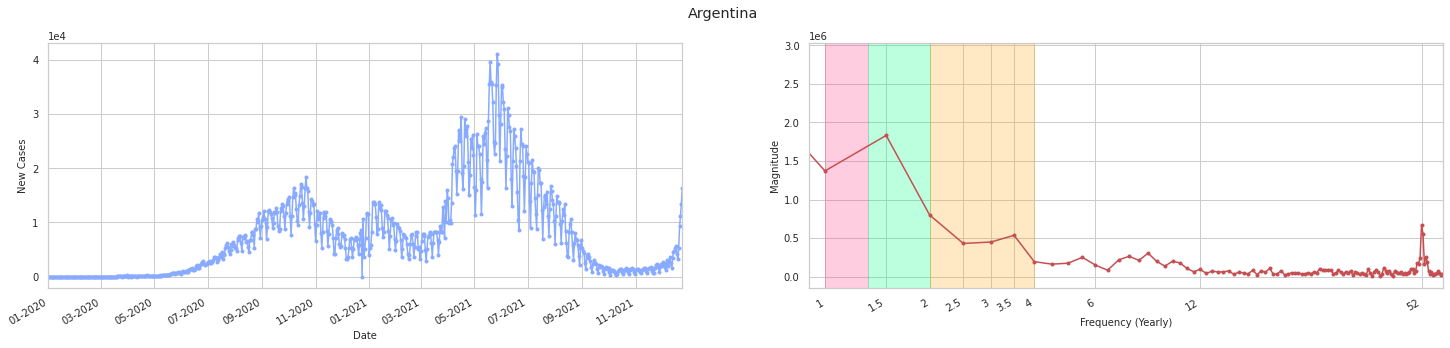

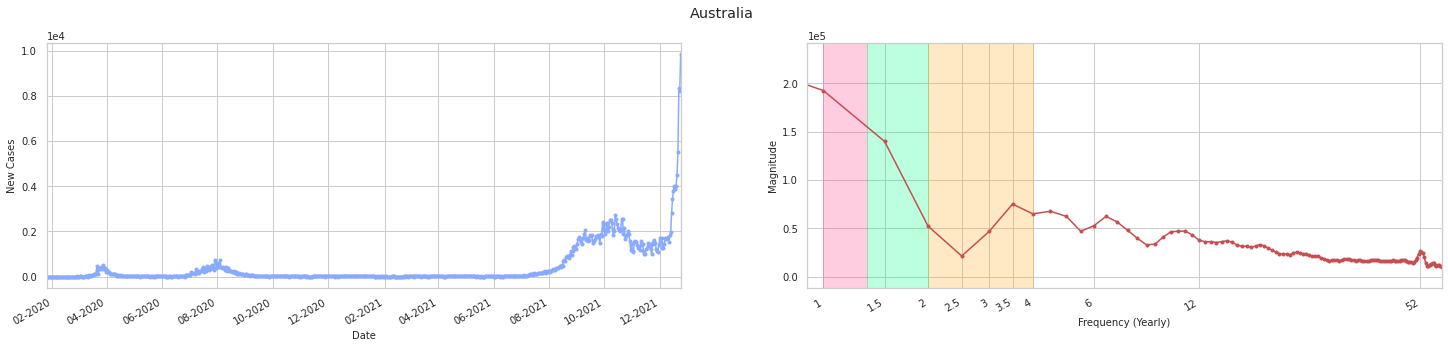

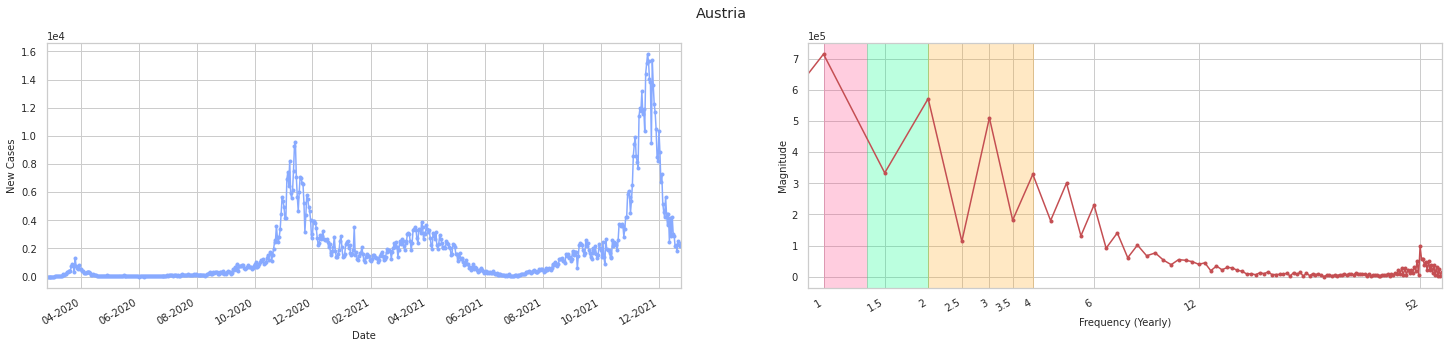

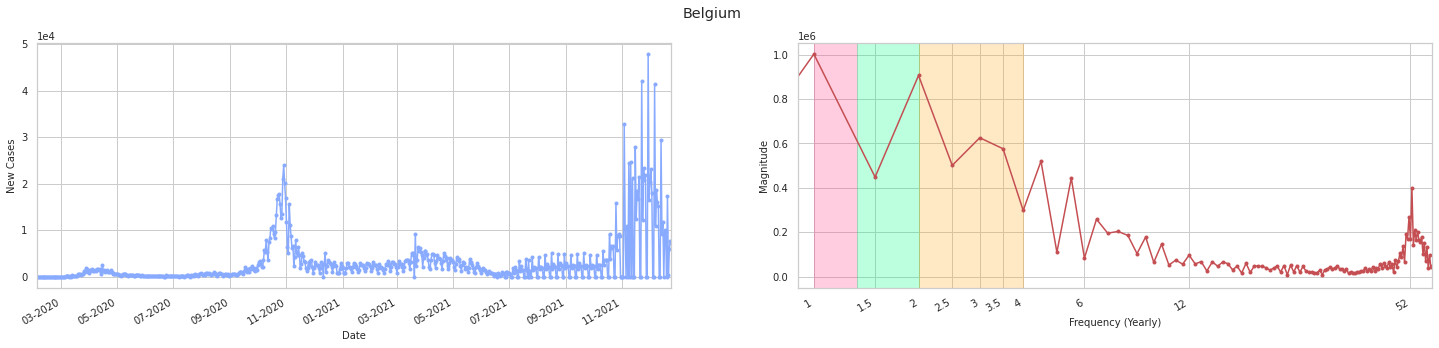

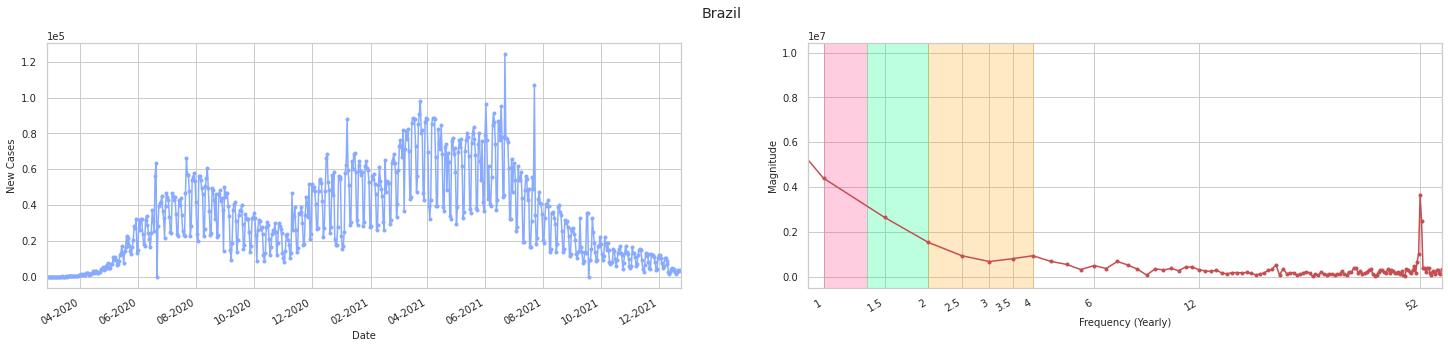

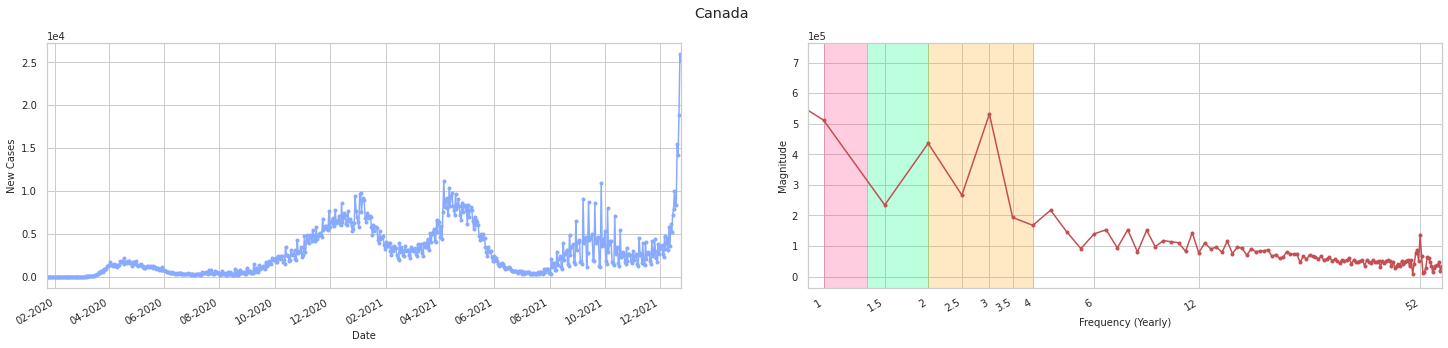

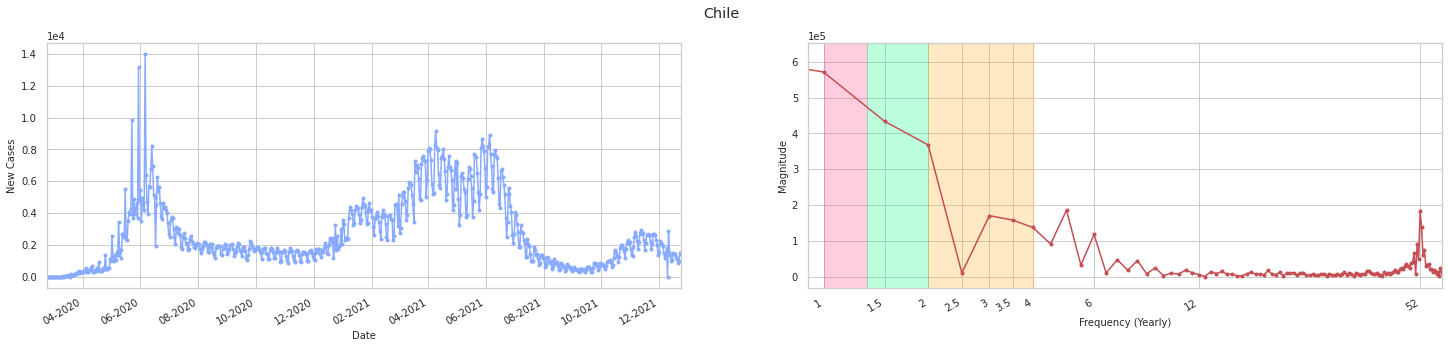

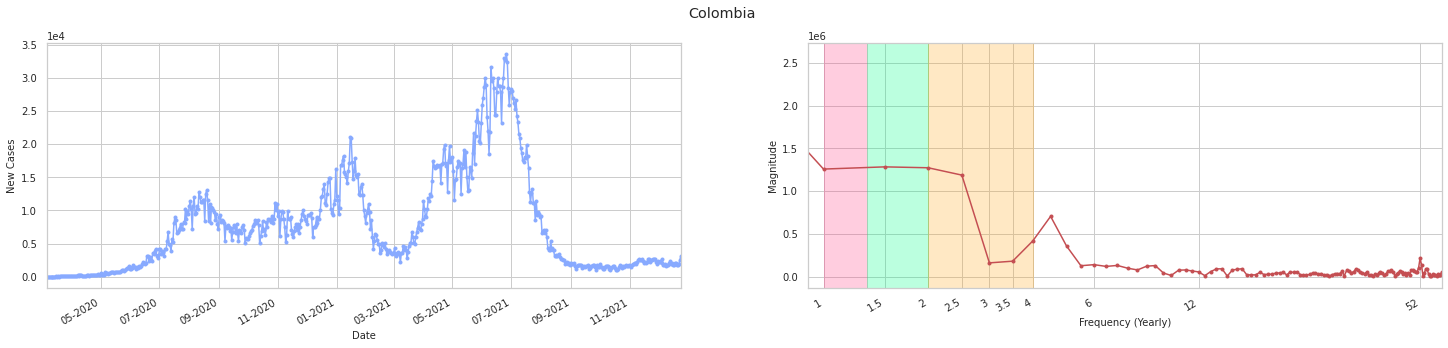

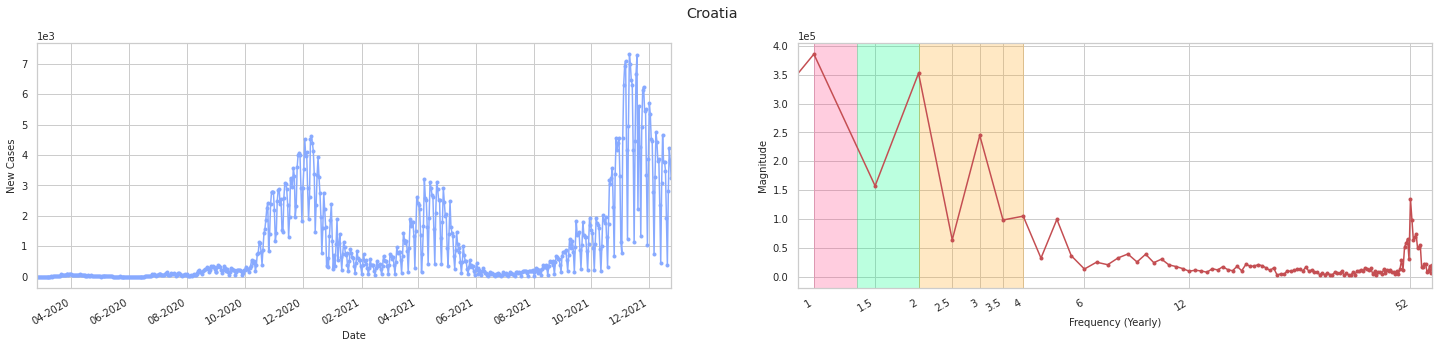

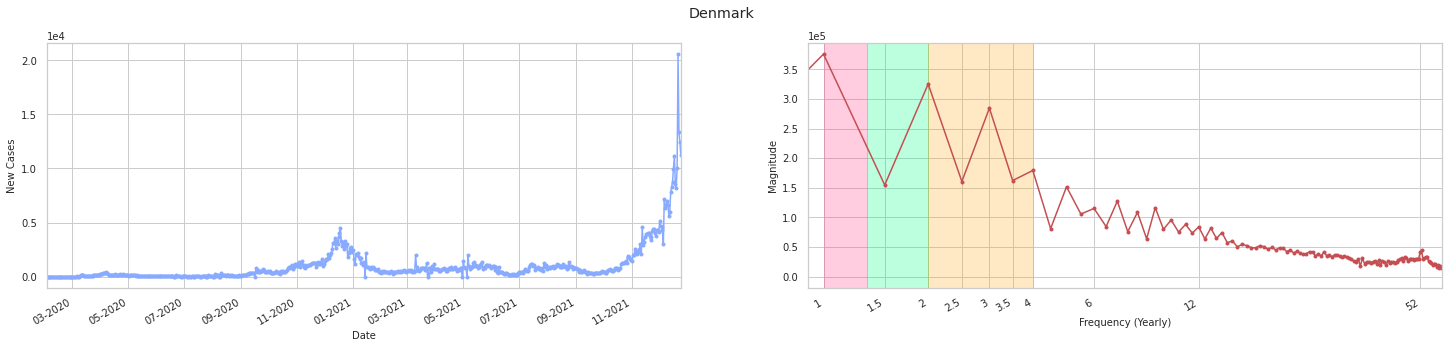

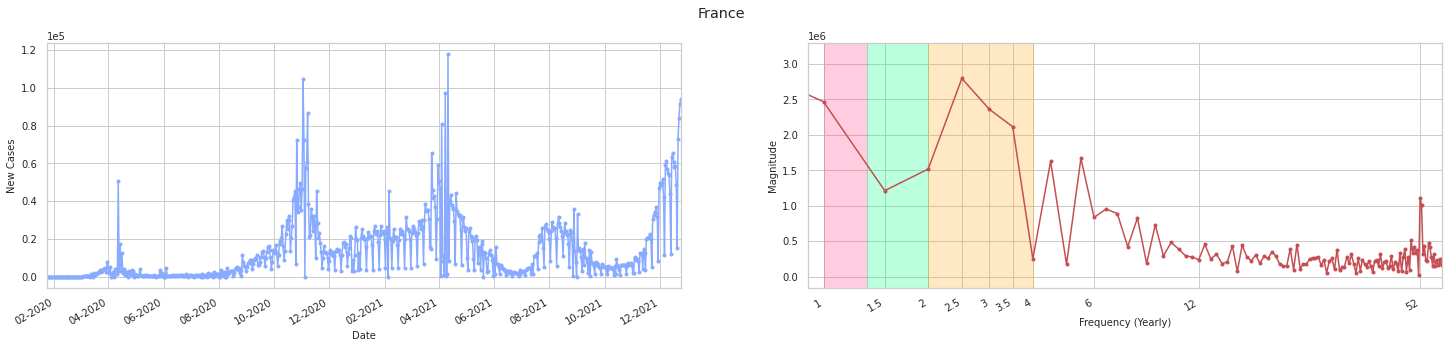

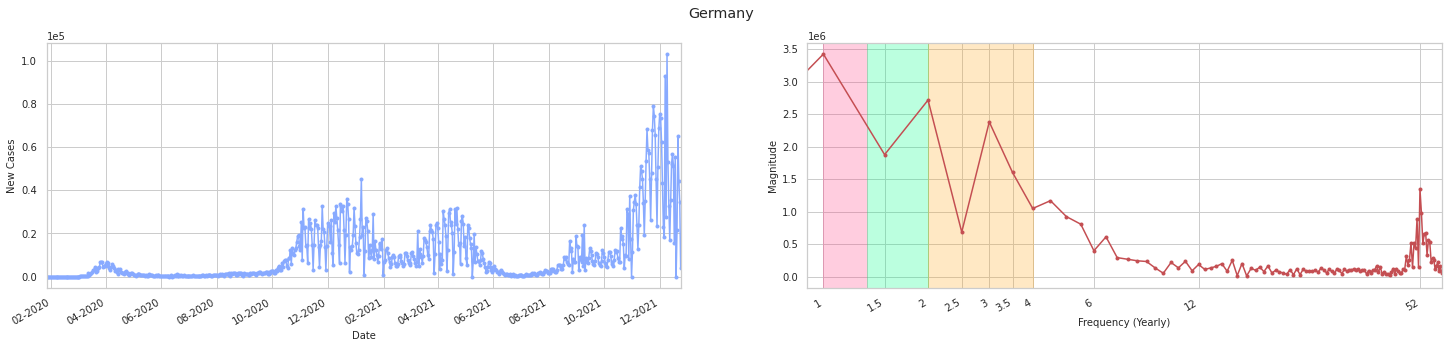

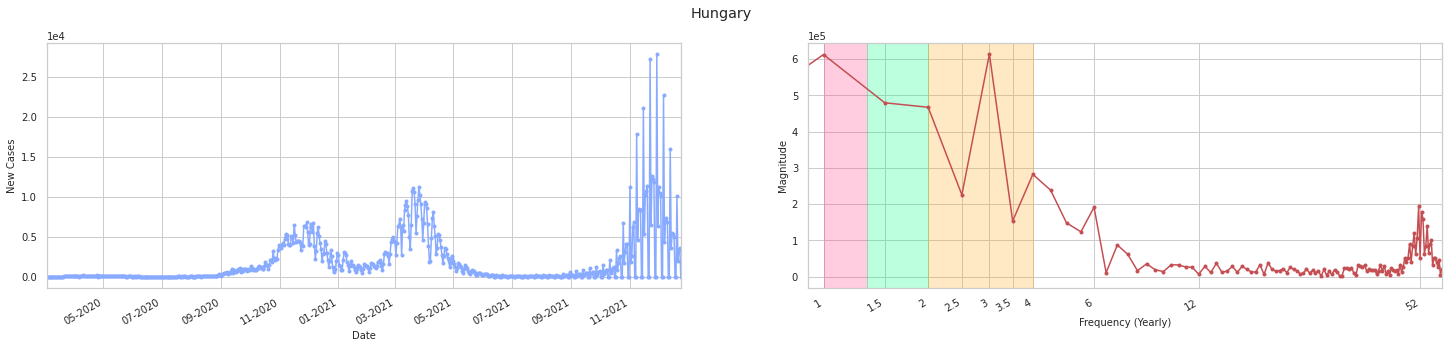

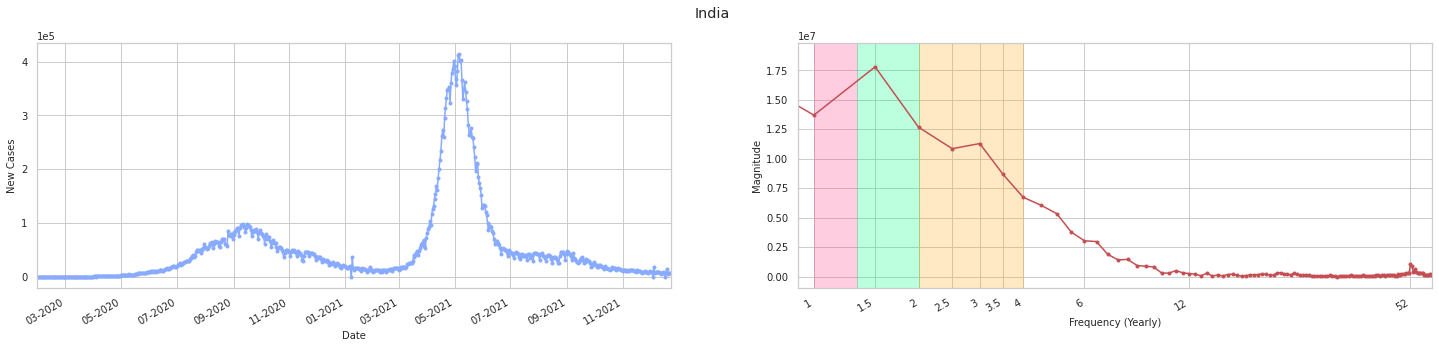

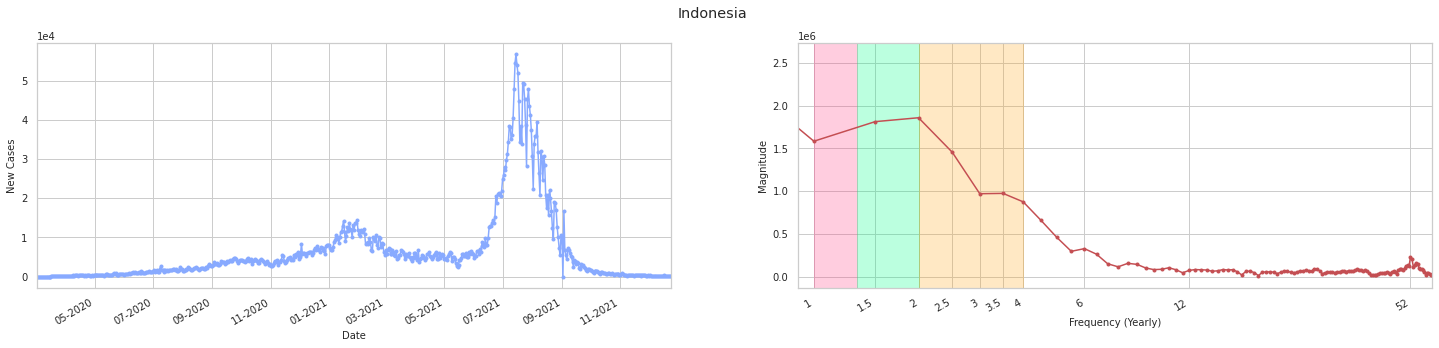

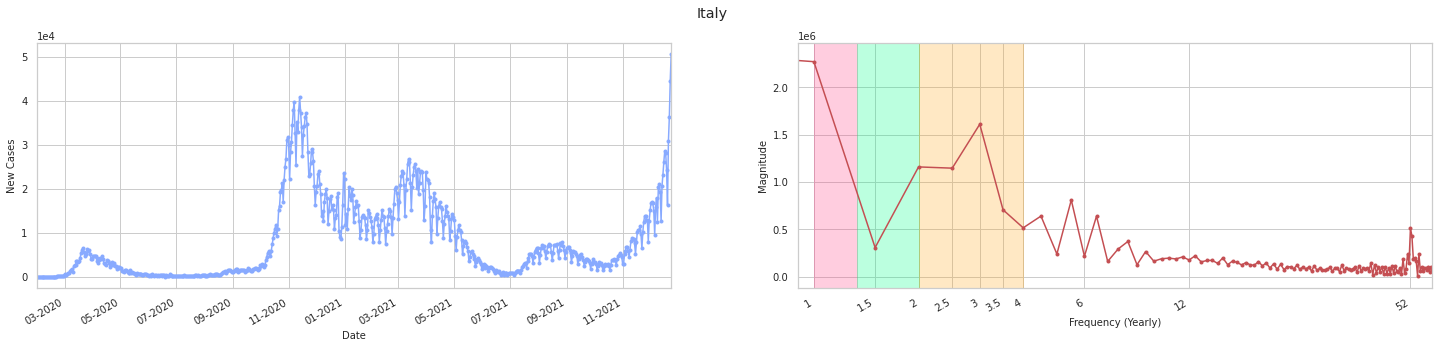

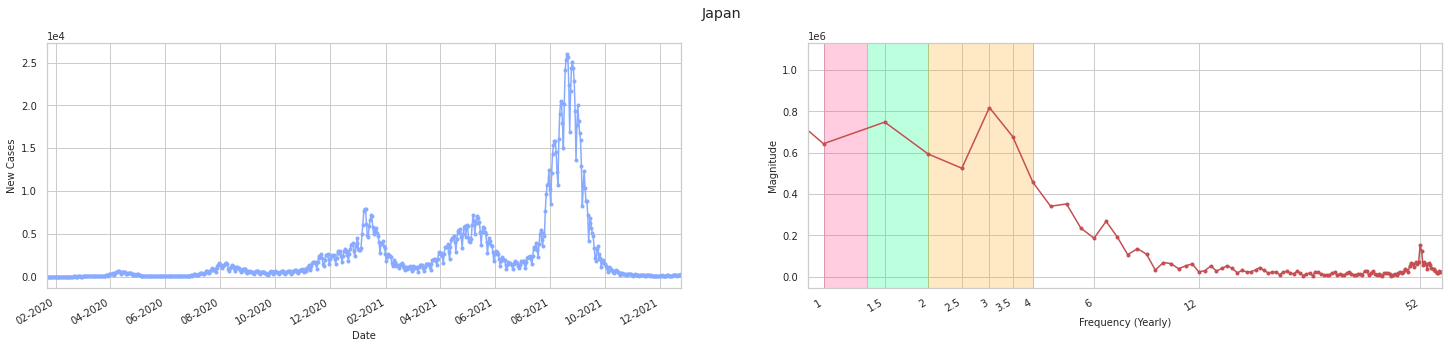

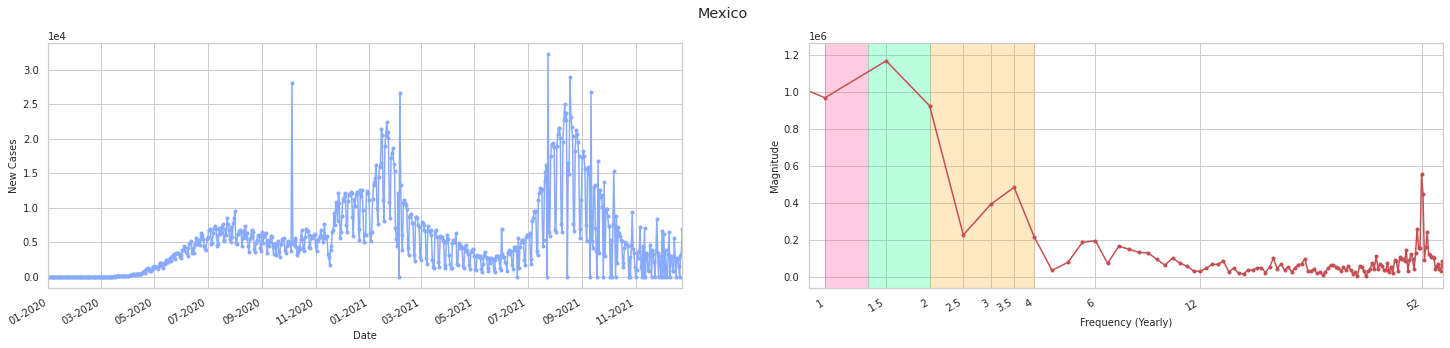

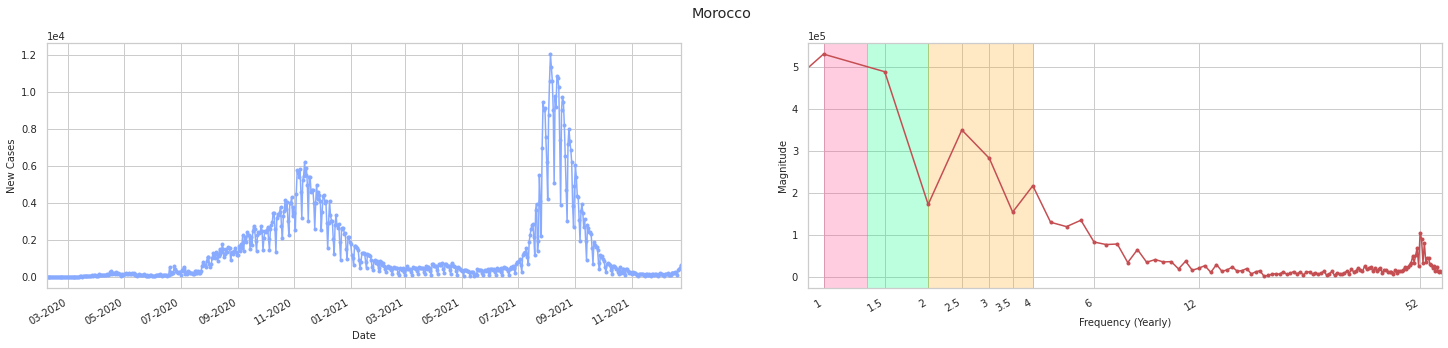

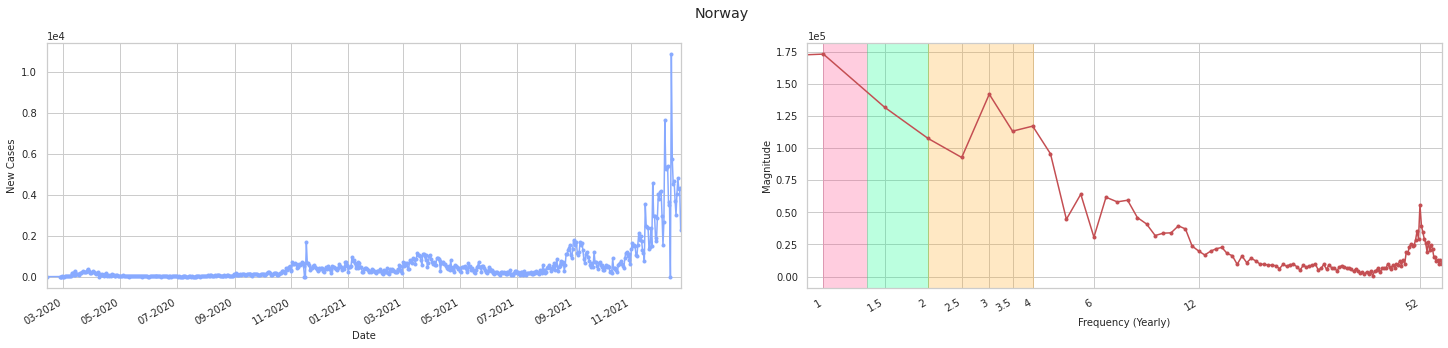

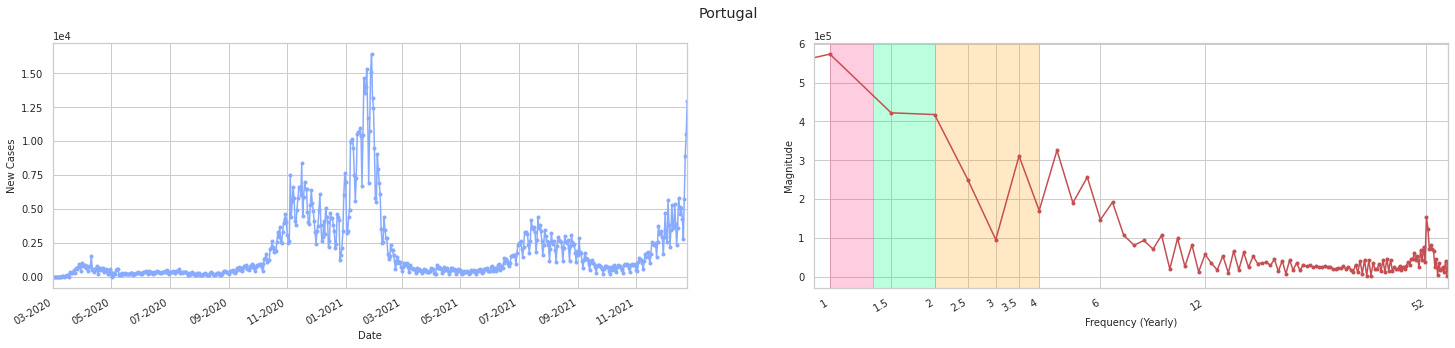

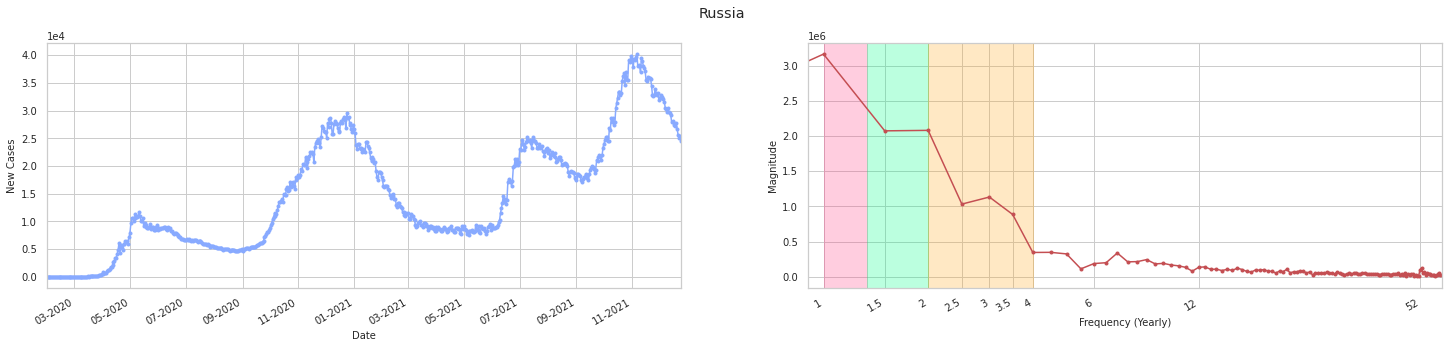

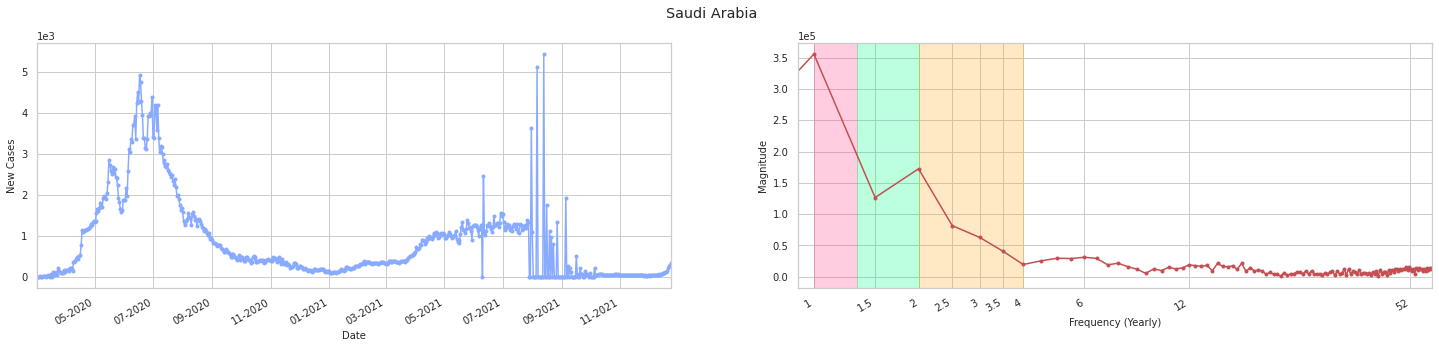

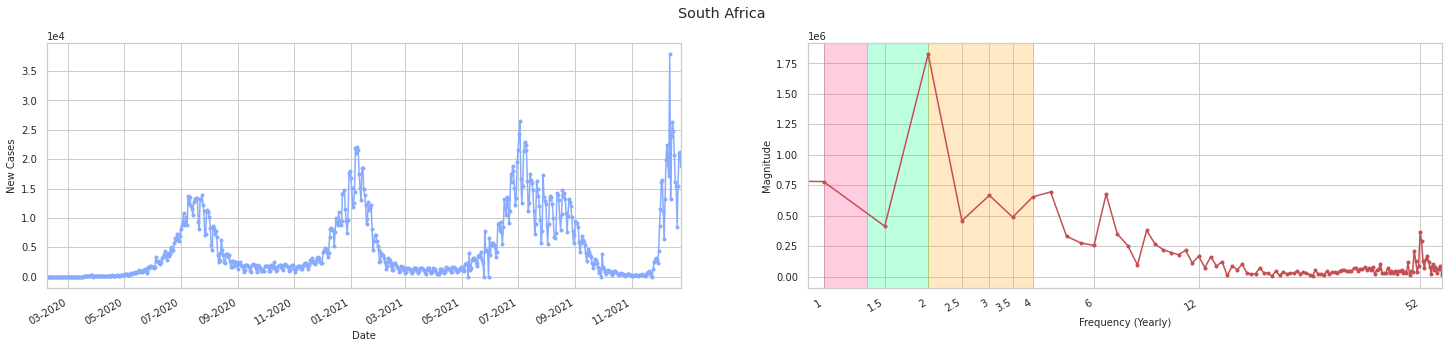

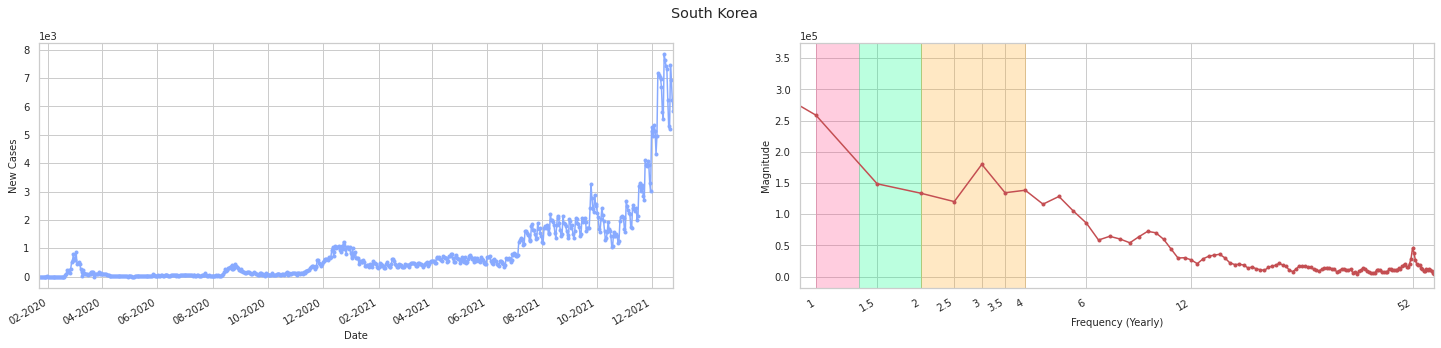

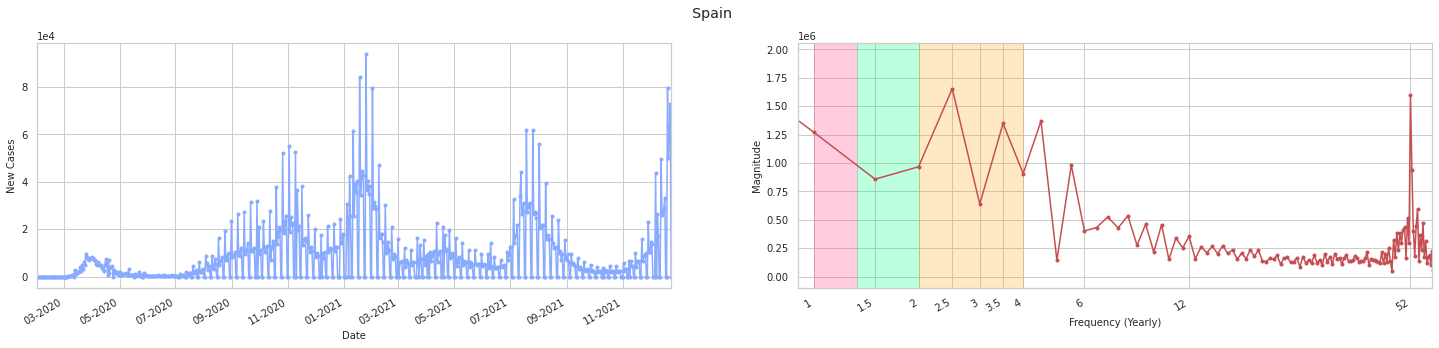

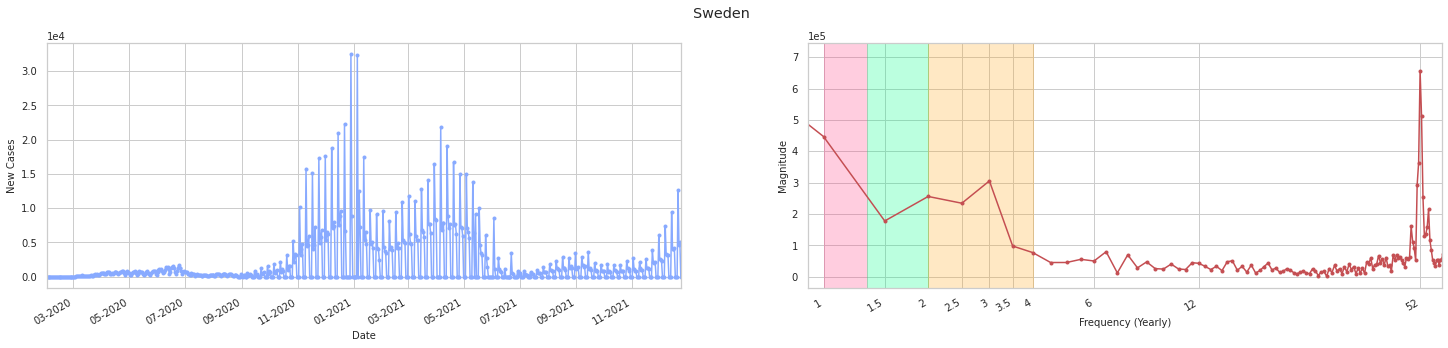

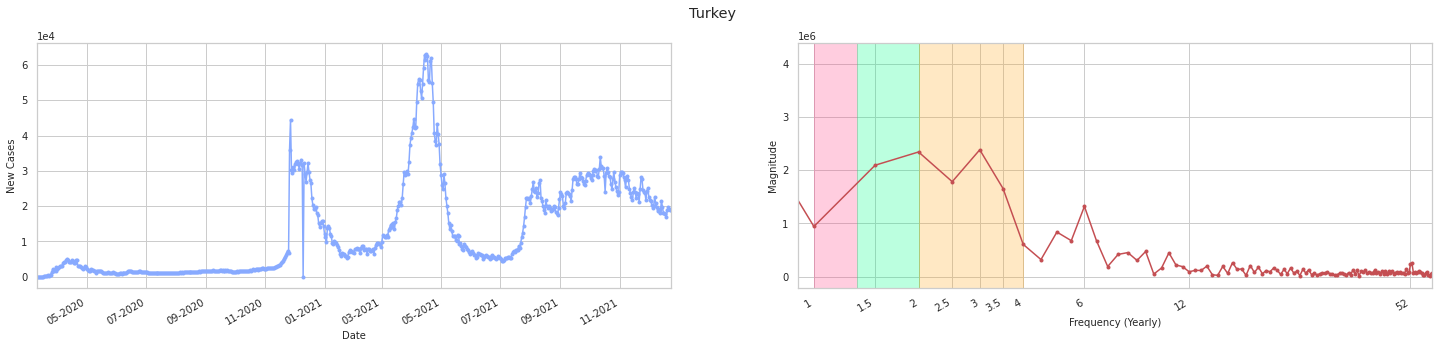

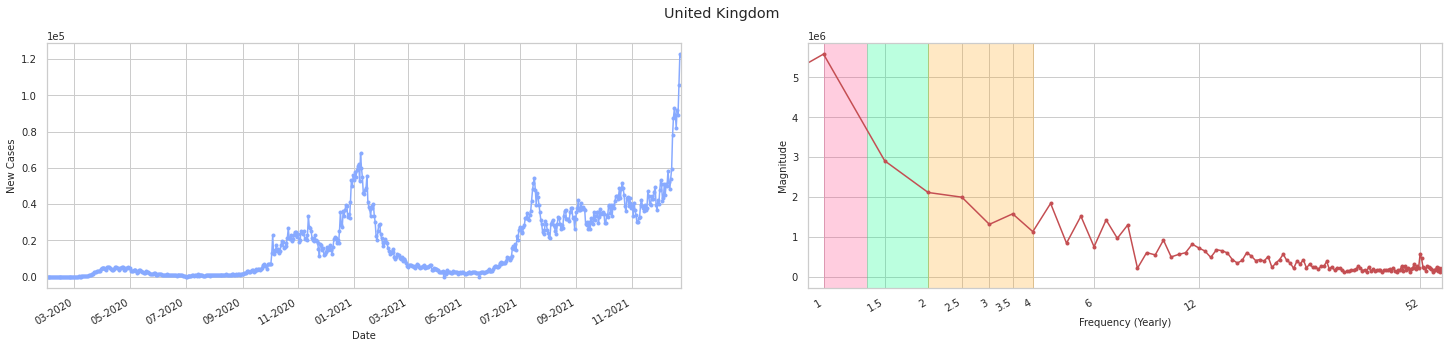

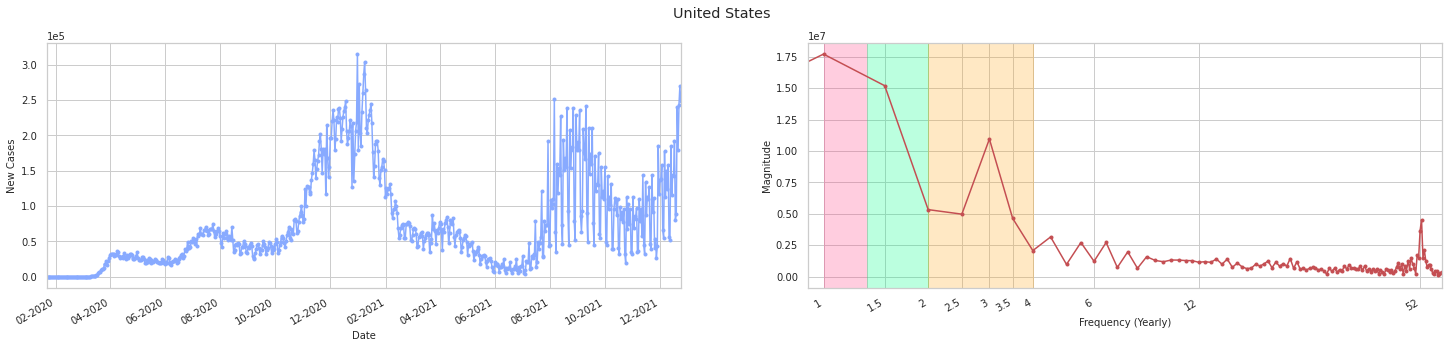

In [ ]:
for nation in nations:
    y = data[(data.location == nation) & (data.date <= "2021-12-24")][['new_cases','date']]
    x = [datetime.strptime(d,'%Y-%m-%d').date() for d in y['date']]
    fig, (ax, ax2) = plt.subplots(1, 2,figsize=(25,5))
    
    # FIGURE A: NUMBER OF NEW DAILY CASES
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.plot(x,y.new_cases.values,".-",color="#8af")
    fig.autofmt_xdate()
    fig.suptitle(nation)
    ax.set_xlabel('Date')
    ax.set_ylabel('New Cases')
    ax.ticklabel_format(axis='y', scilimits=[-3, 3])
    ax.set_xlim((x[0],x[-1])); 
    
    # FIGURE B: DFT OF THE NEW CASES TIMESERIES
    # PADDED WITH 0s TO BE 730 DAYS LONG
    SAMPLE_RATE = 365 #365 DAYS IN A YEAR
    DURATION = 2 #YEARS
    N = SAMPLE_RATE * DURATION
    
    y = np.concatenate([np.zeros(N-len(y)),y.new_cases.values]) #730 days with zero padding
    y = y - np.mean(y) # mean centering
    yf = fft(y)
    xf = fftfreq(N, 1 / SAMPLE_RATE)
    
    ax2.plot(xf[:N//2],np.abs(yf[:N//2]),".-r",)

    ax2.axvspan(xmin=12/12,xmax=12/9,color="#f484")
    ax2.axvspan(xmin=12/9,xmax=12/6,color="#0f84")
    ax2.axvspan(xmin=12/6,xmax=12/3,color="#fa24")
    ax2.ticklabel_format(axis='y', scilimits=[-3, 3])
    ax2.set_xscale("log",basex=2)
    ax2.set_xlim(0.9,60)
    ax2.set_xticks([1,1.5,2,2.5,3,3.5,4,6,12,52])
    ax2.set_xticklabels([1,1.5,2,2.5,3,3.5,4,6,12,52])
    ax2.set_xlabel("Frequency (Yearly)")
    ax2.set_ylabel("Magnitude")
    plt.show()

<u>Imported Libraries</u>
<ul>
  <li>Pandas
  <li>Numpy
  <li>Matplotlib
  <li>Datetime
  <li>Scipy
  <li>Seaborn 
</ul>

## Conclusion:

We generated a frequency analysis of Covid 19 cases of few nations using Fourier Transform with the Scipy Library and plotted them using matplotlib.